# In Class Notebook, Week 10

To access this in near-real time try: https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2025/blob/master/week10/inClass_week10.ipynb

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

In [2]:
data_url = "https://github.com/UIUC-iSchool-DataViz/is445_data/raw/main/building_inventory.csv"

In [3]:
buildings = pd.read_csv(data_url)

In [4]:
buildings.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided


In [5]:
buildings.loc[buildings['Year Acquired']==0, 'Year Acquired'] = np.nan
buildings.loc[buildings['Square Footage']==0, 'Square Footage'] = np.nan

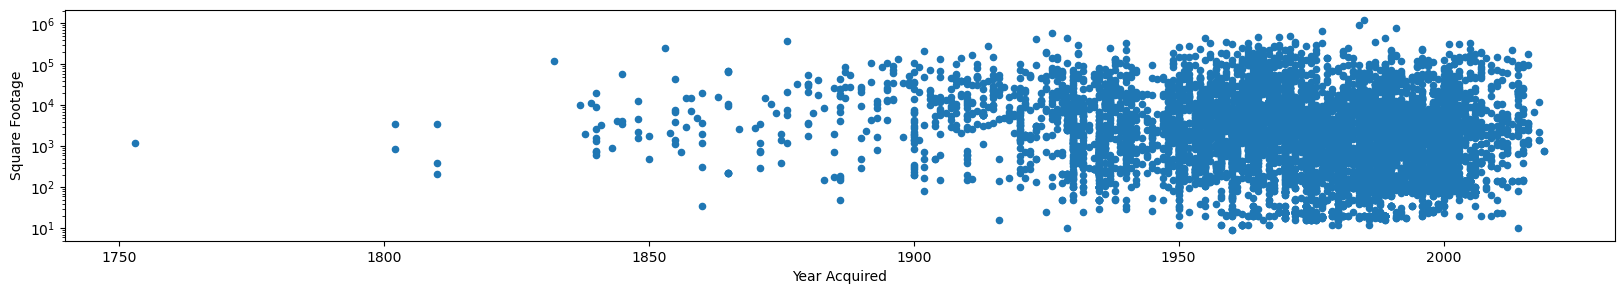

In [6]:
buildings.plot(x='Year Acquired', y='Square Footage', figsize=(20,3), kind='scatter', logy=True)
plt.show()

In [7]:
stats = buildings.groupby('Year Acquired')['Square Footage'].describe()

In [9]:
#stats

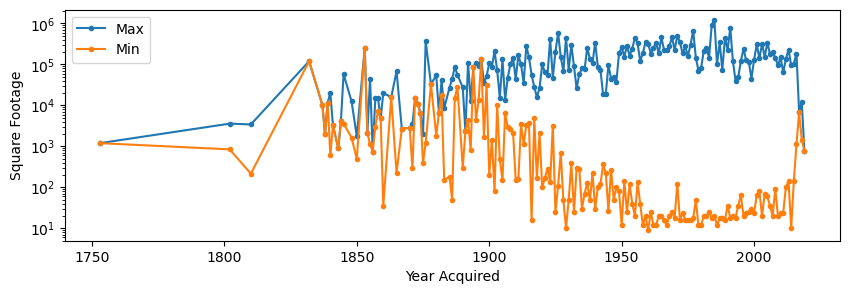

In [14]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(stats['max'], marker='.', label='Max')
ax.plot(stats['min'], marker='.', label='Min')
ax.set_xlabel('Year Acquired')
ax.set_ylabel('Square Footage')
ax.set_yscale('log')
ax.legend()
plt.show()

## Remake 2 line plot in Altair (the hard way)

In [17]:
stats.reset_index().head()

,Year Acquired,count,mean,std,min,25%,50%,75%,max
0,1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.0,1200.0
1,1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.0,3594.0
2,1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.5,3432.0
3,1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.0,120000.0
4,1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.0,10302.0


In [19]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X('Year Acquired:O'),
    alt.Y('max:Q')
)
lines

alt.Chart(...)

In [20]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X('Year Acquired:Q'),
    alt.Y('max:Q')
)
lines

alt.Chart(...)

In [21]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X('Year Acquired:O'),
    alt.Y('max:Q')
).properties(
    width=800
)
lines

alt.Chart(...)

In [22]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X('Year Acquired:T'),
    alt.Y('max:Q')
).properties(
    width=800
)
lines

alt.Chart(...)

In [24]:
stats.index = pd.to_datetime(stats.index.astype('int'), format='%Y')

In [25]:
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753-01-01,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802-01-01,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810-01-01,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832-01-01,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837-01-01,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015-01-01,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016-01-01,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017-01-01,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


In [27]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X('Year Acquired:T'),
    alt.Y('max:Q')
).properties(
    width=800, 
    height=200
)
lines

alt.Chart(...)

In [32]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X('Year Acquired:T'),
    #alt.Y('max:Q')
).properties(
    width=800, 
    height=100
)

# add layers to my plot -- min & max lines
lines = alt.layer(
    lines.mark_line(color='blue').encode(y='max:Q'),
    lines.mark_line(color='orange').encode(y='min:Q')
)
lines

alt.LayerChart(...)

In [33]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X('Year Acquired:T'),
    #alt.Y('max:Q')
).properties(
    width=800, 
    height=100
)

# add layers to my plot -- min & max lines
lines = alt.layer(
    lines.mark_line(color='blue').encode(
        alt.Y('max:Q',scale=alt.Scale(type='log')) 
    ),
    lines.mark_line(color='orange').encode(
        alt.Y('min:Q', scale=alt.Scale(type='log'))
    )
)
lines

alt.LayerChart(...)

## Remaking the plot (the easier way with dataframe changes)

In [35]:
stats_mini = stats[['min','max']]

In [37]:
stats_mini.head()

,min,max
Year Acquired,,
1753-01-01,1200.0,1200.0
1802-01-01,846.0,3594.0
1810-01-01,216.0,3432.0
1832-01-01,120000.0,120000.0
1837-01-01,10302.0,10302.0


In [39]:
stats_melt = stats_mini.reset_index().melt('Year Acquired', var_name='Statistic', value_name='Stat Value')
stats_melt

,Year Acquired,Statistic,Stat Value
0,1753-01-01,min,1200.0
1,1802-01-01,min,846.0
2,1810-01-01,min,216.0
3,1832-01-01,min,120000.0
4,1837-01-01,min,10302.0
...,...,...,...
337,2015-01-01,max,105000.0
338,2016-01-01,max,184000.0
339,2017-01-01,max,6720.0
340,2018-01-01,max,12000.0


In [42]:
# same chart, with the melted stats
lines = alt.Chart(stats_melt).mark_line().encode(
    alt.Y('Stat Value:Q', scale=alt.Scale(type='log')),
    alt.X('Year Acquired:T'),
    color='Statistic:N'
).properties(
    height=100,
    width=800
)
lines

alt.Chart(...)

In [47]:
stats.head()

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753-01-01,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.0,1200.0
1802-01-01,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.0,3594.0
1810-01-01,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.5,3432.0
1832-01-01,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.0,120000.0
1837-01-01,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.0,10302.0


In [59]:
stats_melt2 = stats.reset_index().melt('Year Acquired', var_name='Statistic', value_name = 'Stats Value')
stats_melt2

,Year Acquired,Statistic,Stats Value
0,1753-01-01,count,1.0
1,1802-01-01,count,2.0
2,1810-01-01,count,3.0
3,1832-01-01,count,1.0
4,1837-01-01,count,1.0
...,...,...,...
1363,2015-01-01,max,105000.0
1364,2016-01-01,max,184000.0
1365,2017-01-01,max,6720.0
1366,2018-01-01,max,12000.0


In [62]:
lines2 = alt.Chart(stats_melt2).mark_line().encode(
    alt.Y('Stats Value:Q', scale=alt.Scale(type='log')),
    alt.X('Year Acquired:T'),
    color='Statistic:N'
).properties(
    height=100,
    width=800
)
lines2

alt.Chart(...)

In [63]:
stats_melt2['Stats Value'].min()

0.0

In [64]:
stats_melt2.loc[stats_melt2['Stats Value']==0, 'Stats Value']=np.nan

In [65]:
lines2 = alt.Chart(stats_melt2).mark_line().encode(
    alt.Y('Stats Value:Q', scale=alt.Scale(type='log')),
    alt.X('Year Acquired:T'),
    color='Statistic:N'
).properties(
    height=200,
    width=800
)
lines2

alt.Chart(...)

## Adding interactivity

In [68]:
# add a dropdown
dropdown = alt.binding_select(options=['50%', 'mean', 'min', 'max'], name='Statistic')
# make a selection based on dropdown choice -- this is what we'll add to params
selection = alt.selection_point(fields=['Statistic'], bind=dropdown)
# change the color based on what is selected
color = alt.condition(selection, # based on what I've selected -- boolean
                      alt.Color('Statistic:N'), # if selected, condition is true
                      alt.value('lightgray')) # if not selected, color should be gray

lines2 = alt.Chart(stats_melt2).mark_line().encode(
    alt.Y('Stats Value:Q', scale=alt.Scale(type='log')),
    alt.X('Year Acquired:T'),
    #color='Statistic:N'
    color=color
).properties(
    height=200,
    width=800
).add_params(
    selection
)
lines2

alt.Chart(...)

In [70]:
# add a dropdown
dropdown = alt.binding_select(options=['50%', 'mean', 'min', 'max'], name='Statistic')
# make a selection based on dropdown choice -- this is what we'll add to params
selection = alt.selection_point(fields=['Statistic'], bind=dropdown)
# change the color based on what is selected
color = alt.condition(selection, # based on what I've selected -- boolean
                      alt.Color('Statistic:N'), # if selected, condition is true
                      alt.value('lightgray')) # if not selected, color should be gray
# also change opacity
opacity = alt.condition(selection, alt.value(1.0), alt.value(0.25))

lines2 = alt.Chart(stats_melt2).mark_line().encode(
    alt.Y('Stats Value:Q', scale=alt.Scale(type='log')),
    alt.X('Year Acquired:T'),
    #color='Statistic:N'
    color=color, 
    opacity = opacity
).properties(
    height=200,
    width=800
).add_params(
    selection
)
lines2

alt.Chart(...)